In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/MedicalCostDataSet/medical_costs.csv'
data = pd.read_csv(file_path)
data.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


In [3]:
numerical_stats = data[['Age', 'BMI', 'Children', 'Medical Cost']].describe()
numerical_stats

,Age,BMI,Children,Medical Cost
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.678400,27.40301,2.501700,11898.932216
std,13.807724,7.22896,1.701672,6073.875834
min,18.000000,15.00000,0.000000,3617.090000
25%,30.000000,21.10000,1.000000,5909.925000
50%,42.000000,27.40000,2.000000,7957.430000
75%,54.000000,33.70000,4.000000,17931.962500
max,65.000000,40.00000,5.000000,20268.210000


In [4]:
categorical_stats = data[['Sex', 'Smoker', 'Region']].value_counts().unstack(fill_value=0)
categorical_stats

Region         northeast  northwest  southeast  southwest
Sex    Smoker                                            
female no            636        625        608        645
       yes           624        635        648        613
male   no            620        630        611        633
       yes           634        596        612        630

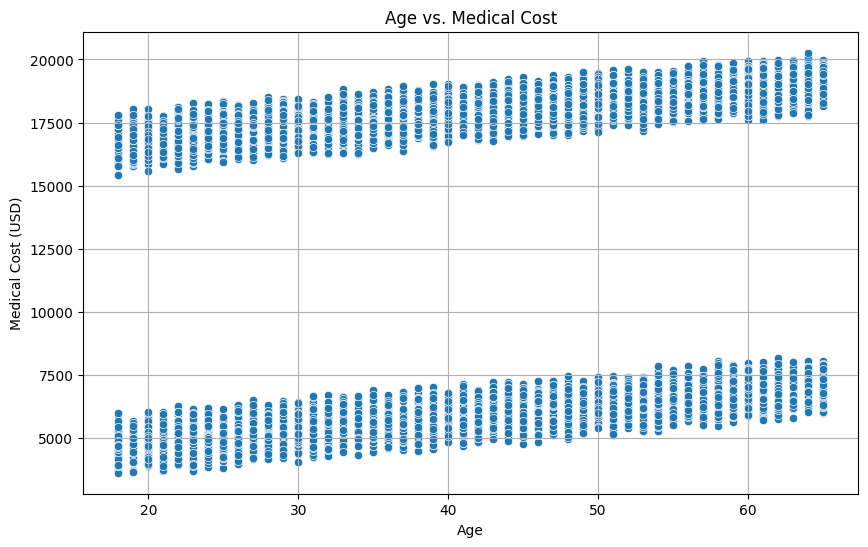

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Yaş ve Tıbbi Maliyet
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Medical Cost', data=data)
plt.title('Age vs. Medical Cost')
plt.xlabel('Age')
plt.ylabel('Medical Cost (USD)')
plt.grid(True)
plt.show()

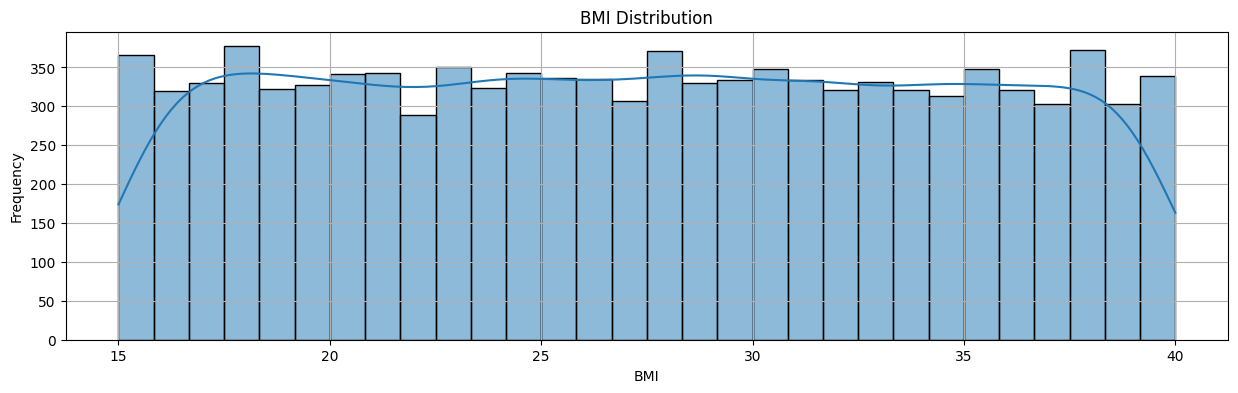

In [15]:
# Histogram: BMI Dağılımı
plt.figure(figsize=(15, 4))
sns.histplot(data['BMI'], bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

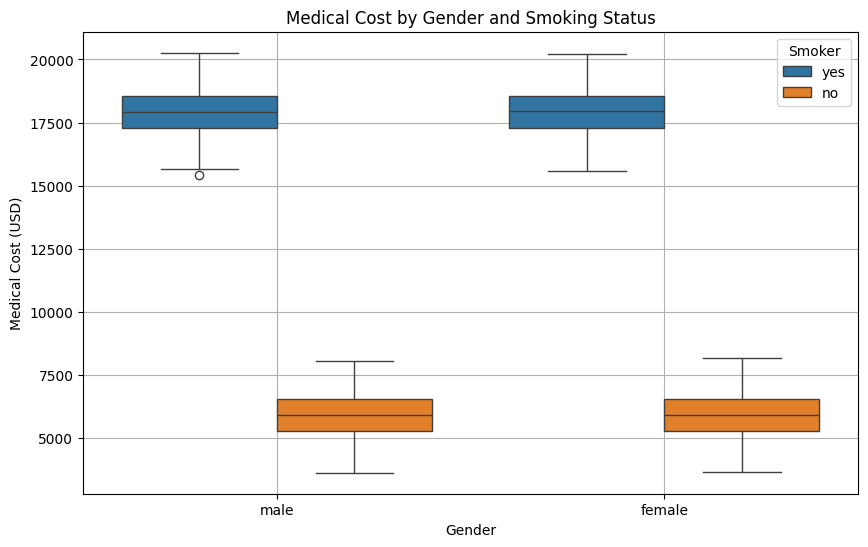

In [16]:
# Box plot: Cinsiyete ve Sigara İçme Durumuna Göre Tıbbi Maliyet
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Medical Cost', hue='Smoker', data=data)
plt.title('Medical Cost by Gender and Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Medical Cost (USD)')
plt.legend(title='Smoker')
plt.grid(True)
plt.show()

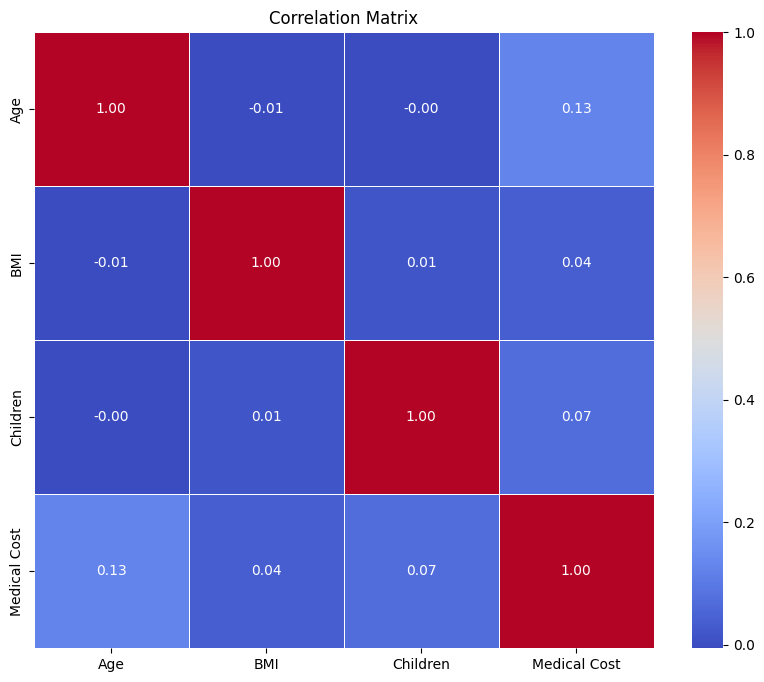

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisi
correlation_matrix = data[['Age', 'BMI', 'Children', 'Medical Cost']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [19]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Regresyon Analizi
data_encoded = pd.get_dummies(data, columns=['Sex', 'Smoker', 'Region'], drop_first=True)
X = data_encoded.drop('Medical Cost', axis=1).astype(float)
y = data_encoded['Medical Cost'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Medical Cost   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.392e+05
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:36:36   Log-Likelihood:                -56695.
No. Observations:                8000   AIC:                         1.134e+05
Df Residuals:                    7991   BIC:                         1.135e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2538.6148     18.214  